# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [454]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from IPython.display import display
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [455]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)
#print(list(zip(lats, lngs)))


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#print("list of city : ",cities)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [456]:

#url =f"https://api.openweathermap.org/data/2.5/weather?"
url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key
#print(url)
response=requests.get(url)
print(response)

#initialize 
recordNum=1
setNum =1
numCityNotFound =0

# Create a dictionary for weather check dataframe (based on the dataframe given in started code)
weatherCheck_dict = {"city":cities,
                     "lon": "",
                     "lat": "",
                     "Max Temp": "",
                     "Humidity": "",
                     "Cloudiness": "",
                     "Wind Speed": "",
                     "Country": "",
                     "Date": "" }

weatherCheck_data = pd.DataFrame(weatherCheck_dict)

print('''Beginning Data Retrieval
-----------------------------''')
#Loop through list of cities and perform a request for data on each of them

for city in cities:
    
    query_url =f"{url}&q={city}"
    #print(query_url)
    response =requests.get(query_url).json()
    #print(response)
    #Try except block to catch the missing city and skipping that one
    try:
        #print log
        print("Processing Record",recordNum,"of Set",setNum,"|",city)
        #Insert data into dataframe
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'lon'] = response['coord']['lon']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'lat'] = response['coord']['lat']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Max Temp'] = response['main']['temp_max']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Humidity'] = response['main']['humidity']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Cloudiness'] = response['clouds']['all']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Wind Speed'] = response['wind']['speed']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Country'] = response['sys']['country']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Date'] = response['dt']
    except :
        print("City not found. Skipping...")
        numCityNotFound+=1
        
    #increment the record num count
    recordNum+=1
    #Condition to print sets by breakig the records into 50 each
    if recordNum == 51:
        setNum+=1
        recordNum =1
        #time.sleep(60)
      
print('''   
-----------------------------
Data Retrieval Complete      
-----------------------------''')

print("**Number of Cities Not found: ",numCityNotFound)

<Response [400]>
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | cayenne
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | igdir
Processing Record 9 of Set 1 | zernograd
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | loei
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | sisimiut
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | pandan
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | filingue
Processing Record 21 of Set 1 | villa rica
Processing Record 22 o

Processing Record 40 of Set 4 | sretensk
Processing Record 41 of Set 4 | izmalkovo
Processing Record 42 of Set 4 | maceio
Processing Record 43 of Set 4 | le pont-de-claix
Processing Record 44 of Set 4 | caravelas
Processing Record 45 of Set 4 | svetlogorsk
Processing Record 46 of Set 4 | edson
Processing Record 47 of Set 4 | ballater
Processing Record 48 of Set 4 | bethel
Processing Record 49 of Set 4 | pangnirtung
Processing Record 50 of Set 4 | samaniego
Processing Record 1 of Set 5 | kotido
Processing Record 2 of Set 5 | saryshagan
City not found. Skipping...
Processing Record 3 of Set 5 | dawei
Processing Record 4 of Set 5 | san jose
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | thung song
Processing Record 7 of Set 5 | ondjiva
Processing Record 8 of Set 5 | carballo
Processing Record 9 of Set 5 | malyye derbety
Processing Record 10 of Set 5 | gulshat
City not found. Skipping...
Processing Record 11 of Set 5 | yingshang
City not found. Skipping...
Processing R

Processing Record 29 of Set 8 | biak
Processing Record 30 of Set 8 | hihifo
City not found. Skipping...
Processing Record 31 of Set 8 | wabrzezno
Processing Record 32 of Set 8 | gamba
Processing Record 33 of Set 8 | nova borova
Processing Record 34 of Set 8 | cortes
Processing Record 35 of Set 8 | turka
Processing Record 36 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 37 of Set 8 | skegness
Processing Record 38 of Set 8 | amderma
City not found. Skipping...
Processing Record 39 of Set 8 | lagoa
Processing Record 40 of Set 8 | conceicao do araguaia
Processing Record 41 of Set 8 | aksu
Processing Record 42 of Set 8 | alta floresta
Processing Record 43 of Set 8 | henties bay
Processing Record 44 of Set 8 | belmonte
Processing Record 45 of Set 8 | waterloo
Processing Record 46 of Set 8 | ixtapa
Processing Record 47 of Set 8 | dinsor
City not found. Skipping...
Processing Record 48 of Set 8 | timizart
Processing Record 49 of Set 8 | acajutla
Processing Record 50 of Set 

Processing Record 12 of Set 12 | riberalta
Processing Record 13 of Set 12 | lethem
Processing Record 14 of Set 12 | middletown
Processing Record 15 of Set 12 | ustupo
Processing Record 16 of Set 12 | wasco
Processing Record 17 of Set 12 | fairborn
Processing Record 18 of Set 12 | shenzhen
Processing Record 19 of Set 12 | wageningen
Processing Record 20 of Set 12 | dali
Processing Record 21 of Set 12 | high rock
Processing Record 22 of Set 12 | jiaojiang
Processing Record 23 of Set 12 | khonuu
City not found. Skipping...
Processing Record 24 of Set 12 | whitehorse
Processing Record 25 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 26 of Set 12 | rawson
Processing Record 27 of Set 12 | antalaha
Processing Record 28 of Set 12 | abu dhabi
Processing Record 29 of Set 12 | salvador
Processing Record 30 of Set 12 | liuzhou
Processing Record 31 of Set 12 | douglas
Processing Record 32 of Set 12 | san juan
Processing Record 33 of Set 12 | fort nelson
Processing Record 34 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [460]:
#export data to csv file
#removing the cities NaN 
weatherCheck_cleandata=weatherCheck_data.dropna()
weatherCheck_cleandata.reset_index(drop=True)
weatherCheck_cleandata.head(10)
weatherCheck_cleandata.to_csv("OutputFiles/CityData.csv", index=False, header=True)

#display dataframe
display(weatherCheck_cleandata.head(15))

,city,lon,lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,cayenne,-52.3333,4.9333,80.10,1.0,0.0,2.30,GF,1.659587e+09
2,provideniya,-173.3000,64.3833,42.91,100.0,75.0,6.71,RU,1.659587e+09
3,atuona,-139.0333,-9.8000,77.58,81.0,36.0,19.84,PF,1.659587e+09
4,bluff,168.3333,-46.6000,57.79,71.0,22.0,14.63,NZ,1.659587e+09
6,butaritari,172.7902,3.0707,82.22,73.0,22.0,14.99,KI,1.659587e+09
7,igdir,44.0450,39.9237,81.59,41.0,20.0,8.05,TR,1.659587e+09
8,zernograd,40.3083,46.8452,72.77,74.0,51.0,5.03,RU,1.659587e+09
9,mataura,168.8643,-46.1927,57.47,68.0,28.0,7.56,NZ,1.659587e+09
10,loei,101.5000,17.4167,78.17,65.0,100.0,4.09,TH,1.659587e+09
11,mar del plata,-57.5575,-38.0023,46.42,84.0,100.0,8.05,AR,1.659587e+09


In [461]:
#In order to get summary of data using DESCRIBE FUNCTION, the values must be in Integer format
print("*****What are the data types ?******")
display(weatherCheck_data.dtypes)

#Convert necessary column to integer
weatherCheck_data[['lon','lat','Max Temp','Humidity','Cloudiness','Wind Speed','Date']]=weatherCheck_data[['lon','lat','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].apply(pd.to_numeric)

    
#Summarize the data
display(weatherCheck_data.describe())


*****What are the data types ?******


city           object
lon           float64
lat           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

,lon,lat,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,12.704703,21.948025,70.039365,73.359788,57.463845,7.696314,1.659587e+09
std,89.950993,32.485855,13.306777,18.764893,39.075288,5.474292,7.685796e+01
min,-175.200000,-54.800000,35.260000,1.000000,0.000000,0.000000,1.659587e+09
25%,-67.711950,-3.872700,60.795000,63.000000,20.000000,3.780000,1.659587e+09
50%,14.284500,26.166700,71.280000,77.000000,72.000000,6.420000,1.659587e+09
75%,92.134300,49.185400,79.645000,88.000000,99.000000,10.255000,1.659587e+09
max,179.316700,78.218600,105.710000,100.000000,100.000000,31.700000,1.659587e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [462]:
print("After Inspection from the summary stats , humidity has not gone above 100% ")



After Inspection from the summary stats , humidity has not gone above 100% 


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

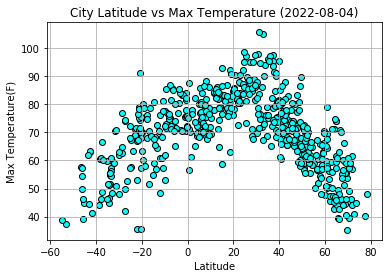

In [463]:
#format the max date in the dataset as "runDate" for graph titles
date = weatherCheck_cleandata["Date"].max()
weatherDate = datetime.utcfromtimestamp(date).strftime('%Y-%m-%d')

plt.title(f"City Latitude vs Max Temperature ({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()

plt.scatter(weatherCheck_cleandata['lat'], weatherCheck_cleandata["Max Temp"],c='cyan', edgecolors="black")
plt.savefig("Images/Latitude_vs_Temperature_Plot.png")
plt.show()

In [464]:
### Insights on Latitude vs. Temperature Plot
## This plot shows that temperature rises at equator(latitude = 0) and falls at either ends of axis with latitute -60 and -80.


## Latitude vs. Humidity Plot

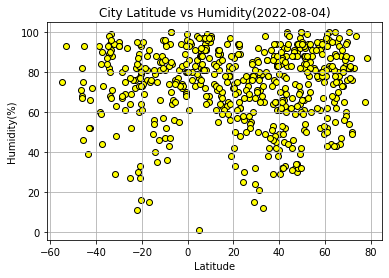

In [465]:
plt.title(f"City Latitude vs Humidity({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

plt.scatter(weatherCheck_cleandata['lat'], weatherCheck_cleandata["Humidity"],c='yellow', edgecolors="black")
plt.savefig("Images/Latitude_vs_Humidity_Plot.png")
plt.show()

In [466]:
### Insights on Latitude vs. Humidity Plot
## This plot shows that humidity is never at a lowest point at the equator (latitude 0).
## It also reveals that all the cities at equator will have a atleast 75% humidity. 

## Latitude vs. Cloudiness Plot

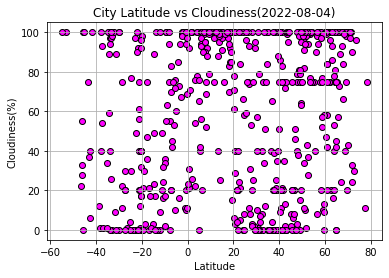

In [467]:
plt.title(f"City Latitude vs Cloudiness({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

plt.scatter(weatherCheck_cleandata['lat'], weatherCheck_cleandata["Cloudiness"],c='magenta', edgecolors="black")
plt.savefig("Images/Latitude_vs_Cloudiness_Plot.png")
plt.show()

In [468]:
### Insights on Latitude vs. Cloudiness Plot
## This graph may not show any correlation but its interesting to observe the density of cities that 100% cloudy and 0% cloudy

## Latitude vs. Wind Speed Plot

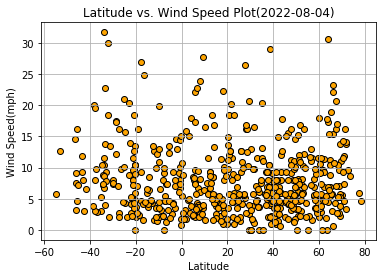

In [469]:
plt.title(f"Latitude vs. Wind Speed Plot({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()

plt.scatter(weatherCheck_cleandata['lat'], weatherCheck_cleandata["Wind Speed"],c='orange', edgecolors="black")
plt.savefig("Images/Latitude_vs_WindSpeed_Plot.png")
plt.show()

In [470]:
### Insights on Latitude vs. Wind Speed Plot Plot
## This plot doesn't show any major correlation

## Linear Regression

In [471]:
#Creating a function so it gets call everytime when it needs the execute same code multiple time

def linearRegression(x,y,xy_1,xy_2):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_equation)
    print(f'The r-square is: {rvalue}')
    
    plt.scatter(x,y,facecolors="violet",edgecolors='red')
    plt.plot(x,regress_values,"r-",color="purple")
    plt.annotate(line_equation,(xy_1,xy_2),fontsize=15,color="purple")

  

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.42x + 88.02
The r-square is: -0.6446161177461323


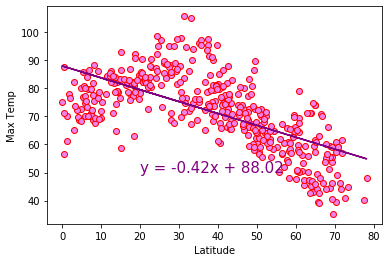

In [472]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Max Temp"]
xy_1=20
xy_2=50

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Max Temp",fontsize=10)

linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.65x + 79.18
The r-square is: 0.6954922987884485


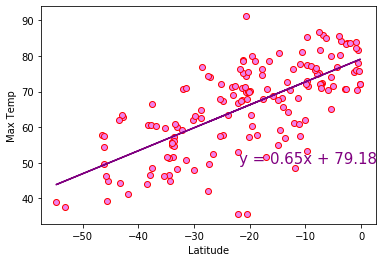

In [473]:
#Data just for sourthern hemisphere, creating another dataframe
southHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Max Temp"]
xy_1=-22
xy_2=50

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Max Temp",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

In [474]:
### Insights on Northwern and Southern Hemisphere - Max Temp vs. Latitude Linear Regression
## This graph shows a  strong correlation. 
## In the northern hemisphere the temperature decreasses as we go away from equator(Latitute =0) and in southern it is opposite

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.03x + 74.41
The r-square is: -0.02770897086471752


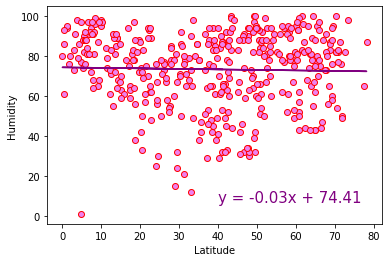

In [475]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Humidity"]
xy_1=40
xy_2=7

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Humidity",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.05x + 74.2
The r-square is: 0.03442400763945078


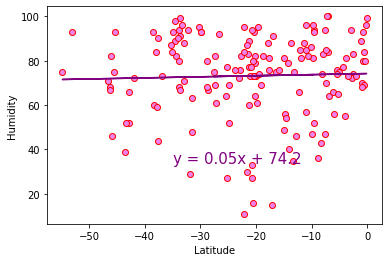

In [476]:
#Data just for southern hemisphere, creating another dataframe
southHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Humidity"]
xy_1=-35
xy_2=34

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Humidity",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

In [477]:
### Insights on Northwern and Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
## There is no correlation between Humidity and latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.05x + 63.19
The r-square is: -0.024073015372637733


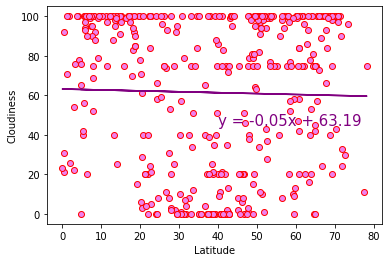

In [478]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Cloudiness"]
xy_1=40
xy_2=45

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Cloudiness",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.05x + 48.32
The r-square is: 0.016511484211560186


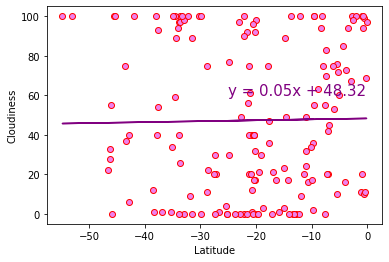

In [479]:
#Data just for southern hemisphere, creating another dataframe
southHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Cloudiness"]
xy_1=-25
xy_2=60

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Cloudiness",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

In [480]:
### Insights on Northwern and Southern Hemisphere -Cloudiness (%) vs. Latitude Linear Regression
## There is no correlation between cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.01x + 6.93
The r-square is: 0.05053079857756574


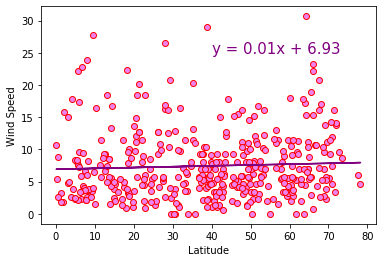

In [481]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Wind Speed"]
xy_1=40
xy_2=25

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Wind Speed",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.08x + 6.61
The r-square is: -0.19150529932888685


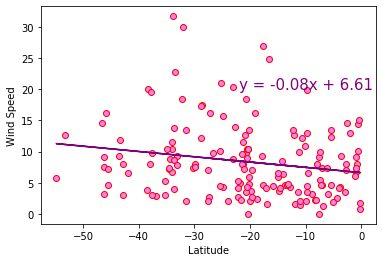

In [482]:
#Data just for northern hemisphere, creating another dataframe
southHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Wind Speed"]
xy_1=-22
xy_2=20

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Wind Speed",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

In [433]:
#### Insights on Northwern and Southern Hemisphere -Wind Speed (mph) vs. Latitude Linear Regression
#### There is no correlation between Wind Speed and latitude.